In [32]:
# Step 1: Load data
import pandas as pd

try:
  df = pd.read_csv(f'../data/car_price_dataset.csv')
  print("Dataset successfully loaded!")

  print("\n🔍 Preview:")
  display(df.head())
except FileNotFoundError:
  print("File not found. Please refer to the README for instructions.")
except Exception as e:
  print(f"An error occurred: {e}")

Dataset successfully loaded!

🔍 Preview:


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [33]:
# Step 2: Preprocess the data
import numpy as np

# Extract 'Year' as the independent variable (x) and 'Price' as the dependent variable (y)
# Reshape the arrays to match the format required by scikit-learn
x = np.array(df.Year).reshape((-1, 1))
y = np.array(df.Price).reshape((-1, 1))

In [34]:
# Step 3: Create the model
from sklearn.linear_model import LinearRegression

# Create a linear regression model object and fit it to our data
# This will find the best fit line between Year (x) and Price (y)
model = LinearRegression().fit(x, y)

# The intercept represents the predicted price when Year=0
print('📈 Intercept', model.intercept_)

# The slope coefficient represents how much the car price changes per year
print('📈 Slope', model.coef_)

📈 Intercept [-592992.65934801]
📈 Slope [[299.19589803]]


In [35]:
# Step 4: Generate predictions
# Generate price predictions using our trained linear regression model
price_prediction = model.predict(x)

# These predictions represent the estimated car prices based on manufacturing year
print('📊 Prediction for verification:', price_prediction)

📊 Prediction for verification: [[11383.05467251]
 [ 8989.48748827]
 [11383.05467251]
 ...
 [ 8391.09569221]
 [ 5997.52850797]
 [ 5698.33260994]]


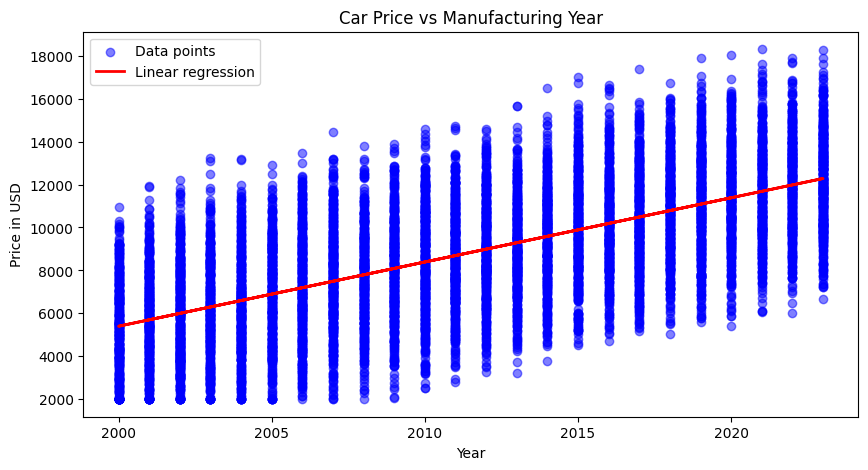

Correlation coefficient of 0.66 and R² of 0.44.
It can be concluded that newer cars generally will cost more. 🤔


In [36]:
# Step 5: Visualize the data and regression
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
plt.plot(x, price_prediction, color='red', linewidth=2, label='Linear regression')

plt.title('Car Price vs Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Price in USD')

plt.legend()
plt.show()

# Calculate and display the correlation coefficient
correlation = np.corrcoef(x.flatten(), y.flatten())[0, 1]

print(f"Correlation coefficient of {correlation:.2f} and R² of {model.score(x, y):.2f}.")
print("It can be concluded that newer cars generally will cost more. 🤔")

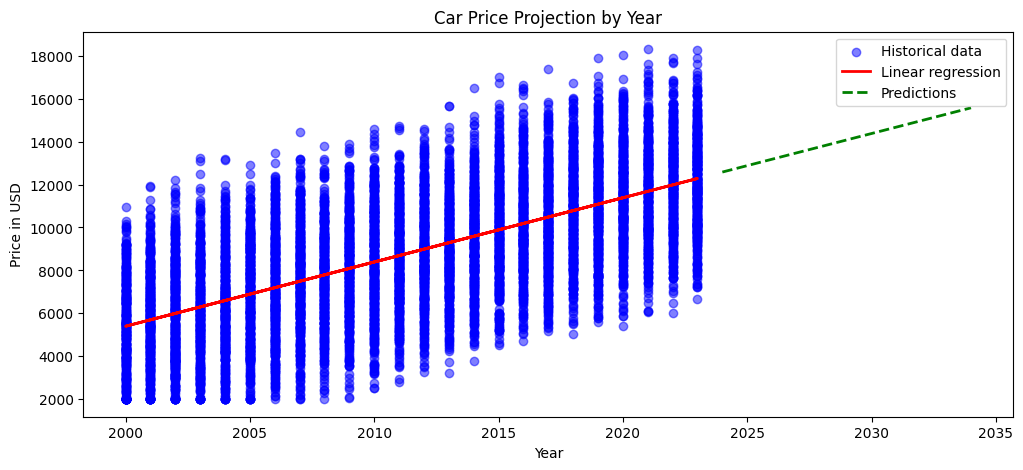

In [37]:
# Step 6: Make predictions
future_years = np.array(range(2024, 2035)).reshape((-1, 1))
future_predictions = model.predict(future_years)

# Visualize the extrapolation
plt.figure(figsize=(12, 5))
plt.scatter(x, y, color='blue', alpha=0.5, label='Historical data')
plt.plot(x, price_prediction, color='red', linewidth=2, label='Linear regression')
plt.plot(future_years, future_predictions, color='green', linewidth=2, linestyle='--', label='Predictions')

plt.title('Car Price Projection by Year')
plt.xlabel('Year')
plt.ylabel('Price in USD')

plt.legend()
plt.show()